In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('economic_index.csv')
df.head()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=["Unnamed: 0","year","month"],inplace=True)

In [5]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

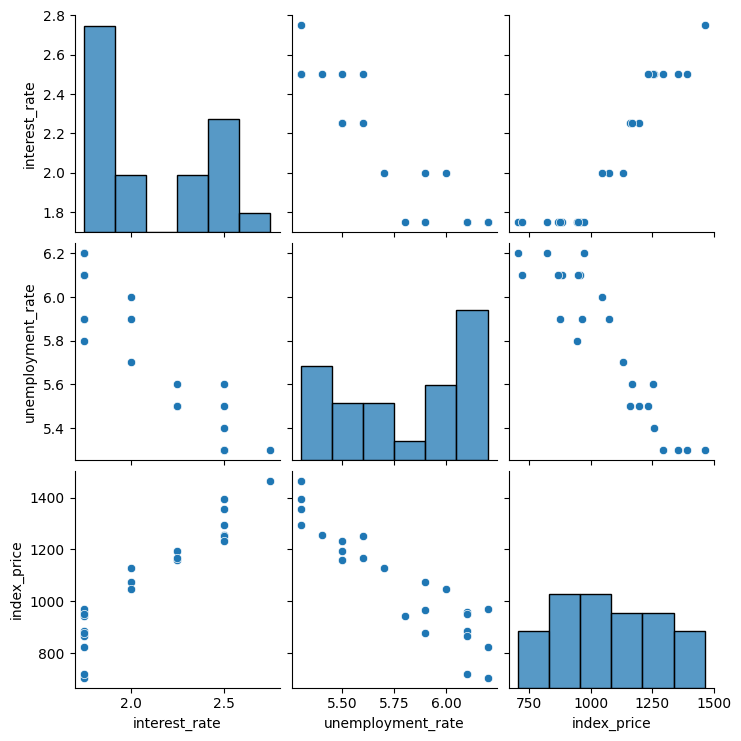

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


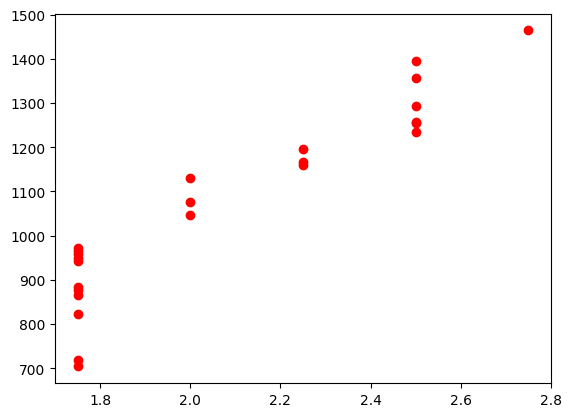

In [9]:
plt.scatter(df['interest_rate'],df['index_price'],color='r')

In [10]:
X=df[['interest_rate',"unemployment_rate"]]
y=df["index_price"]
#or 
#X=df.iloc[:,:-1]
#y=df.iloc[:,:-1]

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Axes(0.125,0.11;0.775x0.77)


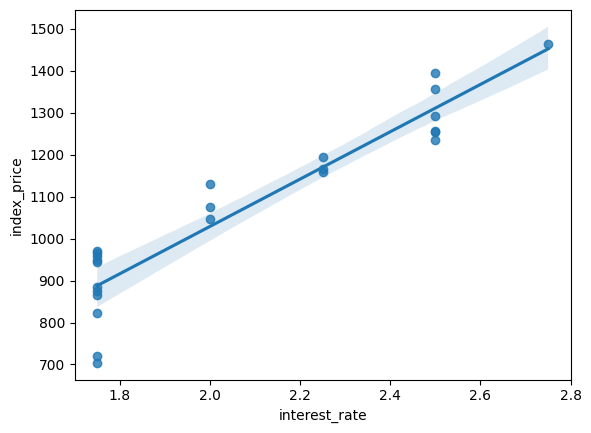

In [12]:
print(sns.regplot(x='interest_rate', y='index_price', data=df)
)


Axes(0.125,0.11;0.775x0.77)


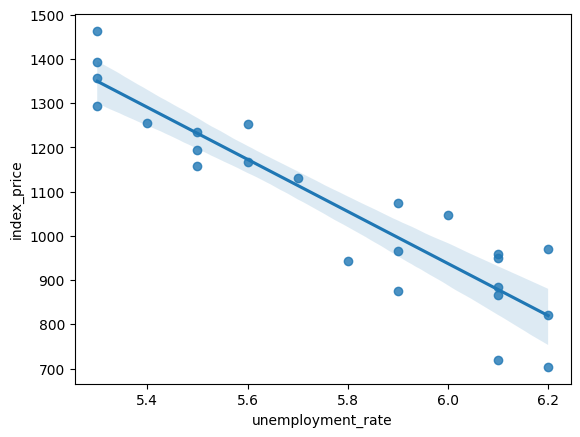

In [13]:
print(sns.regplot(x='unemployment_rate',y='index_price',data=df))

In [14]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
X_train=standard.fit_transform(X_train)
X_test=standard.transform(X_test)

In [15]:
X_test
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [16]:
from sklearn.linear_model import LinearRegression
regession=LinearRegression()

In [17]:
regession.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
validation_score=cross_val_score(regession,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
(validation_score)

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [19]:
regession.coef_

array([  88.27275507, -116.25716066])

In [20]:
regession.intercept_

np.float64(1053.4444444444443)

In [21]:
y_predict=regession.predict(X_test)
y_predict

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_predict)
mse

5793.762887712569

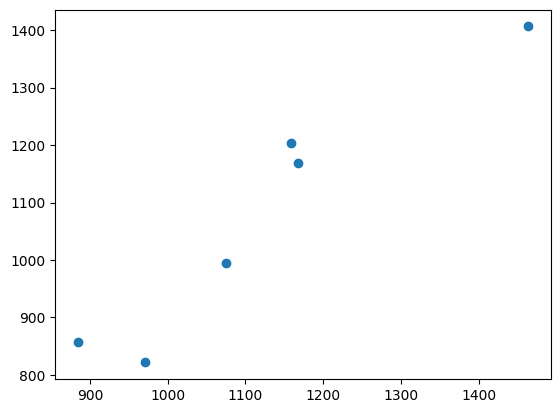

In [23]:
plt.scatter(y_test,y_predict)

In [24]:
##assumption
residual=y_test-y_predict
residual

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

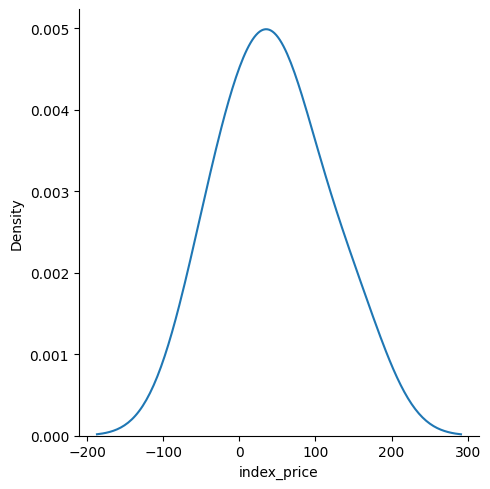

In [ ]:
sns.displot(residual,kind="kde")#kde kya hai

In [26]:
regession.predict([100,34])

ValueError: Expected 2D array, got 1D array instead:
array=[100  34].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# New data must be in the same format (2 columns)
X_new = pd.DataFrame({
    'unemployment_rate': [5.7],
    'interest_rate': [2.0]
})

# Predict
predicted_price = regession.predict(X_new)
print("Predicted final price:", predicted_price[0])


Predicted final price: 1324.084827019195


c:\Users\Administrator\Downloads\Udemy\python\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
